<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## Load and Prepare Data

In [2]:
data=pd.read_csv('Churn.csv')

## EDA

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

<AxesSubplot:>

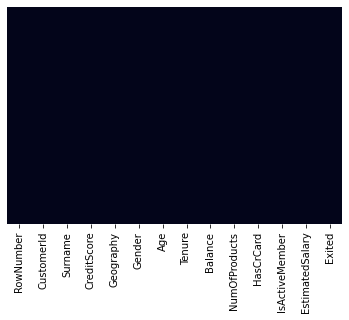

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Strorytelling - Visualization

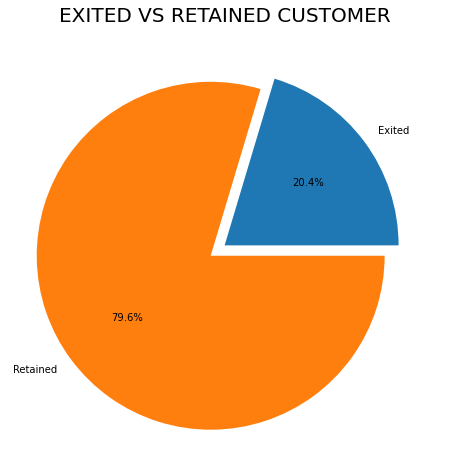

In [10]:
size=[data.Exited[data.Exited==1].count(),data.Exited[data.Exited==0].count()]

plt.figure(figsize=(10,8))
plt.pie(size,labels=('Exited','Retained'),explode=(0,.1),autopct='%1.1f%%');
plt.title('EXITED VS RETAINED CUSTOMER',size=20);

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

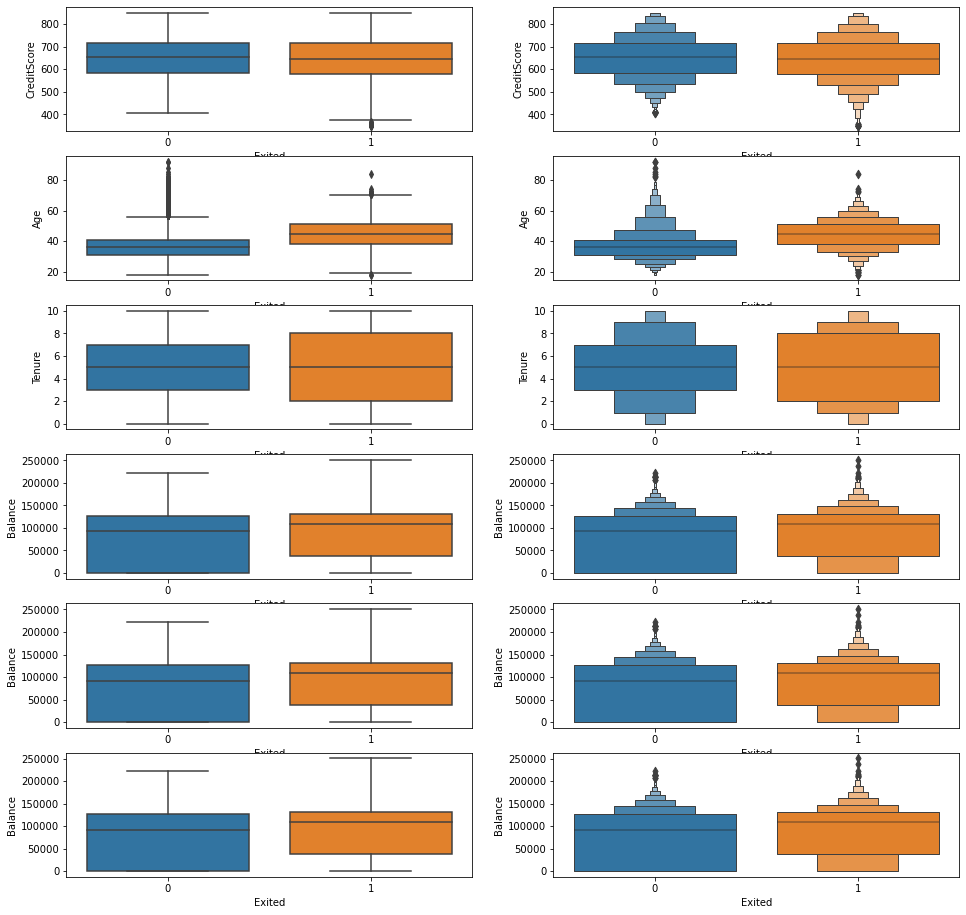

In [11]:
fix,axrr=plt.subplots(6,2,figsize=(16,16))

sns.boxplot(x='Exited',y='CreditScore',data=data,ax=axrr[0][0]);
sns.boxenplot(x='Exited',y='CreditScore',data=data,ax=axrr[0][1])

sns.boxplot(x='Exited',y='Age',data=data,ax=axrr[1][0]);
sns.boxenplot(x='Exited',y='Age',data=data,ax=axrr[1][1])

sns.boxplot(x='Exited',y='Tenure',data=data,ax=axrr[2][0]);
sns.boxenplot(x='Exited',y='Tenure',data=data,ax=axrr[2][1])

sns.boxplot(x='Exited',y='Balance',data=data,ax=axrr[3][0]);
sns.boxenplot(x='Exited',y='Balance',data=data,ax=axrr[3][1])

sns.boxplot(x='Exited',y='Balance',data=data,ax=axrr[4][0]);
sns.boxenplot(x='Exited',y='Balance',data=data,ax=axrr[4][1])

sns.boxplot(x='Exited',y='Balance',data=data,ax=axrr[5][0]);
sns.boxenplot(x='Exited',y='Balance',data=data,ax=axrr[5][1])

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

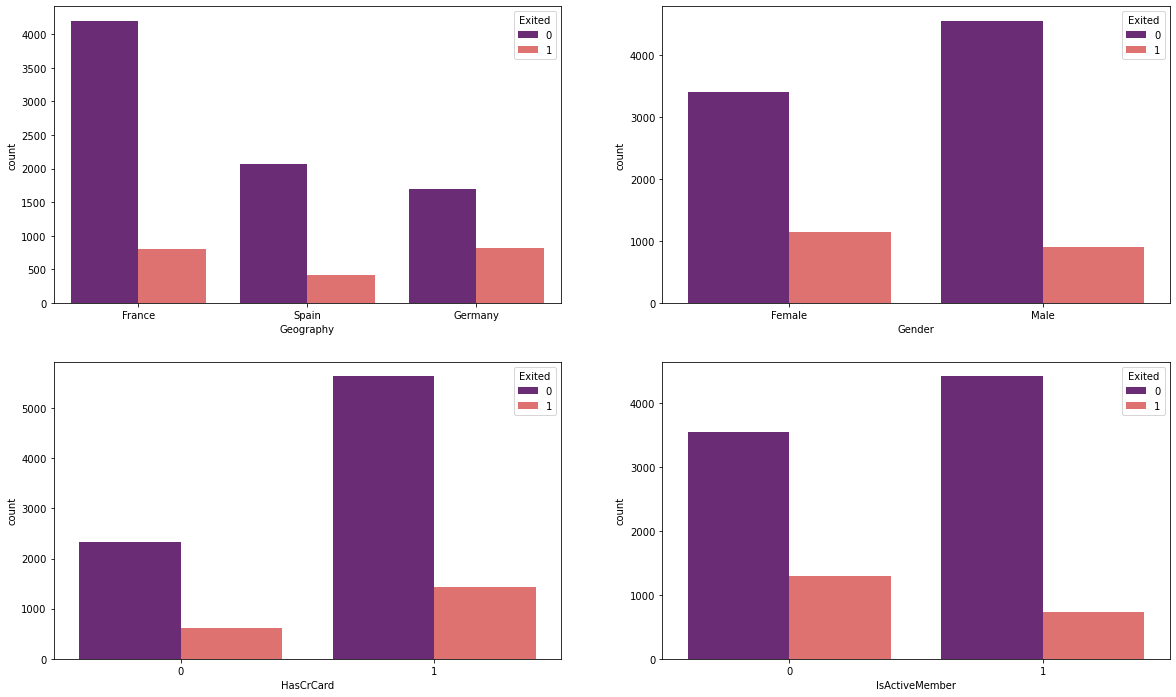

In [12]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='Geography',hue='Exited',data=data,palette='magma')

plt.subplot(2,2,2)
sns.countplot(x='Gender',hue='Exited',data=data,palette='magma')

plt.subplot(2,2,3)
sns.countplot(x='HasCrCard',hue='Exited',data=data,palette='magma')

plt.subplot(2,2,4)
sns.countplot(x='IsActiveMember',hue='Exited',data=data,palette='magma')


## Prepare Data for Machine learning

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
y=data['Exited']
data.drop('Exited',axis=1,inplace=True)

In [15]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough')

In [16]:
X=ct.fit_transform(data)

In [17]:
sc=StandardScaler()

In [18]:
X=sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

## Train your model

In [20]:
xgb=XGBClassifier()

In [21]:
xgb.fit(X_train,y_train)

C:\Users\Special One\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
xgb_pred=xgb.predict(X_test)

In [23]:
rfc=RandomForestClassifier(criterion = 'entropy', random_state = 42)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [25]:
rfc_pred=rfc.predict(X_test)

In [26]:
#Logestic Regression

In [27]:
lr=LogisticRegression(solver='lbfgs')

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
lr_pred=lr.predict(X_test)

## Test the model and show the metrics

In [30]:
# XGBOOST accuracy :

In [31]:
accuracy_score(y_test,xgb_pred)

0.8644

In [32]:
# Random Forest accuracy :

In [33]:
accuracy_score(y_test,rfc_pred)

0.868

In [34]:
# accuracy & roc for Logestic Regression

In [35]:
lr_probs=lr.predict_proba(X_test)

In [36]:
lr_probs=lr_probs[:,1]

In [37]:
accuracy_score(y_test,lr_pred)

0.8072

In [38]:
roc_auc_score(y_test,lr_probs)

0.7740240745521557

In [39]:
fpr , tpr, _ = roc_curve(y_test,lr_probs)

In [40]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr , linewidth=2 , label=label)
    plt.plot([0,1],[0,1],'k--')
    
    

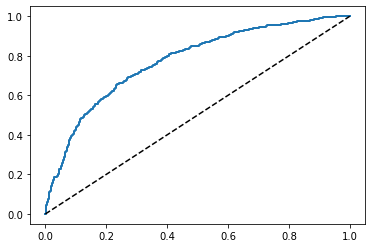

In [41]:
plot_roc_curve(fpr,tpr)

## Save your final model

In [42]:
#!pip install joblib

In [43]:
#import joblib

In [44]:
joblib.dump(rfc,'my_rfc.pkl')

['my_rfc.pkl']

## Send us the Result (Maktabkhoone)